# 単回帰分析
- pythonで単回帰分析をする
- 参考文献：
    - 「データサイエンス育成講座」
    - 山本「計量経済学」
    - 黒住「計量経済学」
    - 「Rによる計量経済分析」

### ライブラリ

In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

'%.3f'

### データの生成
- 理想的なデータ

### データのダウンロードと読み込み
- 現実のデータ

In [5]:
import requests, zipfile
from io import StringIO
import io

In [14]:
# URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
# データをURLから取得
r = requests.get(url, stream=True)
# zipファイルを展開
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [15]:
!ls

student-mat.csv       student-por.csv       単回帰分析.ipynb
student-merge.R       student.txt


In [16]:
!mkdir ../data/stats

In [17]:
!mv student* ../data/stats/

In [18]:
!ls

単回帰分析.ipynb


In [21]:
student_data_math = pd.read_csv('../data/stats/student-mat.csv', sep=';')

In [22]:
student_data_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [23]:
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 単回帰分析をやってみる

### 分析対象を整理

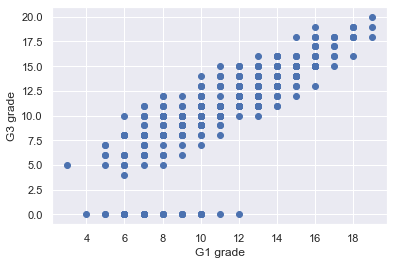

In [26]:
# 一期目の数学の成績と最終期の数学の成績の散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

### sklearnで単回帰

In [28]:
from sklearn import linear_model

In [34]:
reg = linear_model.LinearRegression()

In [35]:
X = student_data_math.loc[:, ['G1']].values
Y = student_data_math['G3'].values
reg.fit(X, Y)
print('回帰係数:', reg.coef_)
print('切片:', reg.intercept_)
print('決定係数:', reg.score(X, Y))

回帰係数: [1.106]
切片: -1.6528038288004634
決定係数: 0.6423508460522701


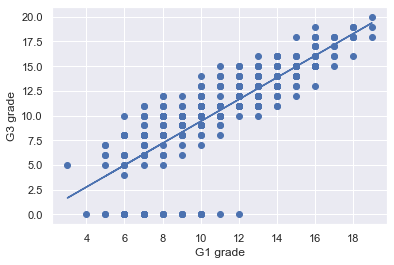

In [36]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)

### statsmodelsで単回帰

In [38]:
import statsmodels.api as sm

In [45]:
model = sm.OLS(Y, sm.add_constant(X))

In [46]:
results = model.fit()

In [47]:
results.params

array([-1.653,  1.106])

In [48]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     705.8
Date:                Thu, 06 May 2021   Prob (F-statistic):           9.00e-90
Time:                        19:02:25   Log-Likelihood:                -958.11
No. Observations:                 395   AIC:                             1920.
Df Residuals:                     393   BIC:                             1928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6528      0.475     -3.481      0.0

### 言葉の定義と説明
- Model
    - OLS:
- Method:


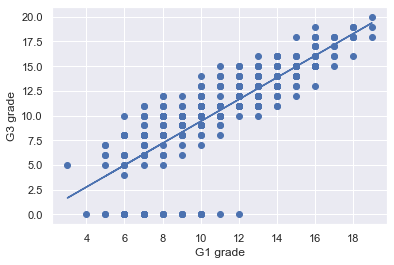

In [53]:
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, results.fittedvalues)
plt.grid(True)